In [64]:
from keras.models import load_model
from PIL import Image
from IPython.display import display 
import PIL.ImageOps 
import numpy as np
labels = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [65]:
model = load_model('my_model.h5')

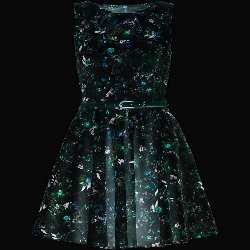

In [106]:
im = Image.open("./test_data/IMG-3.JPG")
size = 250, 250
new_im = PIL.ImageOps.invert(im.resize(size))
display(new_im)

In [107]:
im_28 = new_im.resize((28, 28))
im_28_gr = im_28.convert('L')
display(im_28_gr)

In [17]:
# im_28_gr.save('./test_data/IMG-12-GR.JPG')

In [45]:
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# img = load_img('./test_data/IMG-4.JPG', target_size=(28, 28), grayscale=True)  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)

In [108]:
# x.shape

In [109]:
im_28_gr_arr = np.asarray(im_28_gr).astype('float32')
im_28_gr_arr.shape
im_28_gr_arr /= 255
# x /= 255
# x = x.astype('float32')
x_test = np.array([im_28_gr_arr.reshape(28, 28, 1)])
# x_test = np.array([x.reshape(28, 28, 1)])
# x_test = im_28_gr_arr.reshape(28, 28, 1)
x_test.shape

(1, 28, 28, 1)

In [110]:
0

0

(1, 28, 28, 1)

In [111]:
result = model.predict(x_test)
result.shape

(1, 10)

In [112]:
np.sort(result[0])

array([0.00586696, 0.00930688, 0.05371135, 0.07133284, 0.0858876 ,
       0.09481368, 0.14321458, 0.15930223, 0.16030435, 0.21625954],
      dtype=float32)

In [113]:
index = sorted(range(len(result[0])), key=lambda i: result[0][i], reverse=True)[:3]
result[0][index]
for i in index:
    print(labels[i])

Bag
Dress
Trouser


In [114]:
result.argmax(axis=-1)

array([8])